## Todo:
- install AGAMA and test potential differences w.r.t Gala

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gala
import gala.potential as gp
import gala.dynamics as gd

import sys
sys.path.append("../../bfe_integrator/src/bfe_tools/")
from read_coefficients import load_scf_coefficients
import astropy.units as u
plt.style.use('~/matplotlib.mplstyle')
import agama

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# AGAMA's  coefficients path 

In [3]:
lmc_traj = np.loadtxt('../../data/expansion/vasiliev23/L2M10/trajlmc.txt')

In [4]:
mw_traj = np.loadtxt('../../data/expansion/vasiliev23/L2M10/trajlmc.txt')

In [8]:
np.shape(lmc_traj)

(1409, 7)

In [24]:
lmc_traj[-1][1:4]

array([ -0.83592, -41.7413 , -26.12877])

In [53]:
lmc_traj[:,0]

array([-1.10000000e+01, -1.09921875e+01, -1.09843750e+01, ...,
       -1.56250000e-02, -7.81250000e-03,  0.00000000e+00])

In [81]:
def get_mwlmc_agama_potential(time):
    times  = np.loadtxt('../../data/expansion/vasiliev23/L2M10/boundmass.txt')
    lmc_t = times[:,0]
    lmc_traj = np.loadtxt('../../data/expansion/vasiliev23/L2M10/trajlmc.txt')
    traj_t = lmc_traj[:,0]
    traj_pos = lmc_traj[:,1:4]
    
    get_snap = np.where(lmc_t == time)[0][0]
    get_traj = np.where(traj_t == time)[0][0]
    print(get_snap)
    print(get_traj)
    
    lmc_pot = agama.Potential('../../data/expansion/vasiliev23/L2M10/lmc{:3d}.ini'.format(get_snap))
    mw_pot = agama.Potential('../../data/expansion/vasiliev23/L2M10/mwhalo{:3d}.ini'.format(get_snap))
    print(traj_pos[get_traj])
    lmc_pot_m = agama.Potential(potential=lmc_pot, center=traj_pos[get_traj])
    
    pot_mwlmc = agama.Potential(mw_pot, lmc_pot_m)
    return pot_mwlmc, traj_pos[:get_traj+1]

In [82]:
pot_t0, lmc_traj0 = get_mwlmc_agama_potential(0.0)
pot_t1, lmc_traj1 = get_mwlmc_agama_potential(-1.0)
pot_t2, lmc_traj2 = get_mwlmc_agama_potential(-2.0)

176
1408
[ -0.83592 -41.7413  -26.12877]
160
1280
[ 30.9786  180.52968 -33.99964]
144
1152
[ 33.28561 286.83806  32.99181]


In [77]:
grid = np.linspace(-400, 400, 400)
y_grid, z_grid = np.meshgrid(grid, grid)

In [78]:
amwlmc_t0 = pot_t0.force(np.array([np.zeros(len(y_grid.flatten())), y_grid.flatten(), z_grid.flatten()]).T)
amwlmc_t1 = pot_t1.force(np.array([np.zeros(len(y_grid.flatten())), y_grid.flatten(), z_grid.flatten()]).T)
amwlmc_t2 = pot_t2.force(np.array([np.zeros(len(y_grid.flatten())), y_grid.flatten(), z_grid.flatten()]).T)

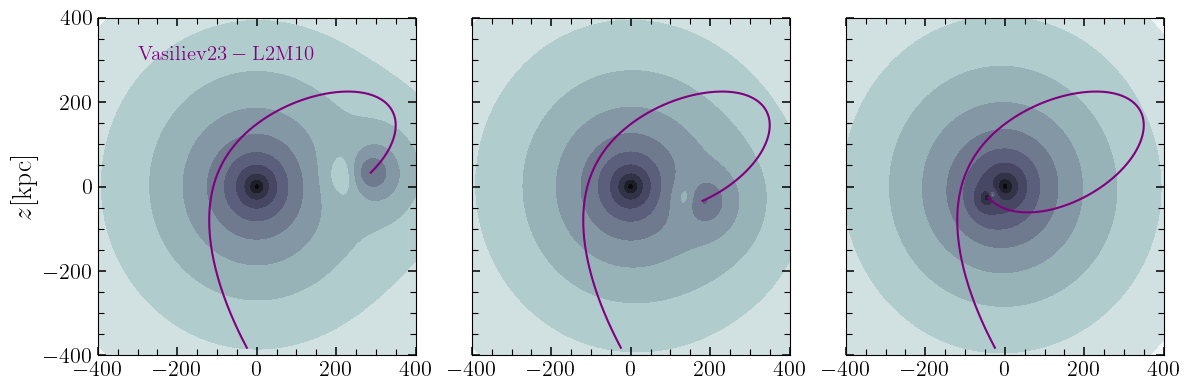

In [127]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
ax[2].contourf(y_grid, z_grid, np.log10(norm(amwlmc_t0, axis=1).reshape(400, 400)), 10, cmap='bone_r')
ax[1].contourf(y_grid, z_grid, np.log10(norm(amwlmc_t1, axis=1).reshape(400, 400)), 10, cmap='bone_r')
ax[0].contourf(y_grid, z_grid, np.log10(norm(amwlmc_t2, axis=1).reshape(400, 400)), 10, cmap='bone_r')

ax[2].plot(lmc_traj0[:,1], lmc_traj0[:,2], c='purple')
ax[1].plot(lmc_traj1[:,1], lmc_traj1[:,2], c='purple')
ax[0].plot(lmc_traj2[:,1], lmc_traj2[:,2], c='purple')

#ax[0].plot(lmc_traj1[1, 2])
#ax[0].plot(lmc_traj2[1, 2])

ax[0].set_ylabel(r'$z\rm{[kpc]}$')
ax[0].text(-300, 300, r'$\rm{Vasiliev23-L2M10}$', fontsize=15, c='purple')

plt.tight_layout()

plt.savefig('../../figures/agama_ac_fields.pdf', bbox_inches='tight')

In [ ]:
for t in range():
    pot_t0, lmc_traj0 = get_mwlmc_agama_potential(t)


In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
ax[2].contourf(y_grid, z_grid, np.log10(norm(amwlmc_t0, axis=1).reshape(400, 400)), 10, cmap='bone_r')
ax[1].contourf(y_grid, z_grid, np.log10(norm(amwlmc_t1, axis=1).reshape(400, 400)), 10, cmap='bone_r')
ax[0].contourf(y_grid, z_grid, np.log10(norm(amwlmc_t2, axis=1).reshape(400, 400)), 10, cmap='bone_r')

ax[2].plot(lmc_traj0[:,1], lmc_traj0[:,2])
ax[1].plot(lmc_traj1[:,1], lmc_traj1[:,2])
ax[0].plot(lmc_traj2[:,1], lmc_traj2[:,2])

#ax[0].plot(lmc_traj1[1, 2])
#ax[0].plot(lmc_traj2[1, 2])

plt.savefig('../../figures/agama_ac_fields.pdf', bbox_inches='tight')